<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666/blob/main/Google_Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Mobility Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


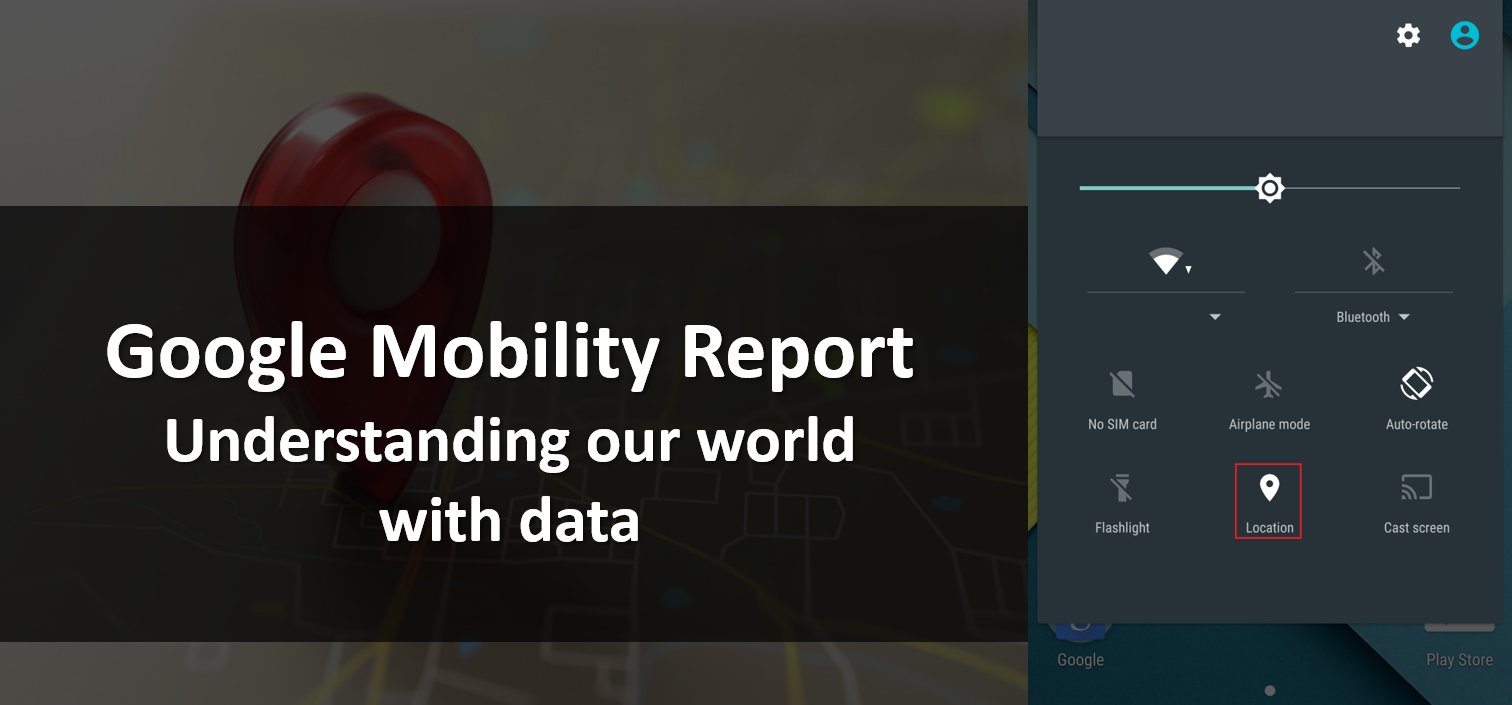

In [ ]:
from IPython.display import Image
Image(filename="gdrive/My Drive/Files/Intro2.png")

**COVID-19 Community Mobility Reports**

On April 3, 2020, the giant Google released the COVID-19 Community Mobility Reports, in an effort to aid policy makers to witness the effects of public decisions to tackle the pandemic at a global level.

As its [website](https://www.blog.google/technology/health/covid-19-community-mobility-reports) states:

"In Google Maps, we use aggregated, anonymized data showing how busy certain types of places are—helping identify when a local business tends to be the most crowded. We have heard from public health officials that this same type of aggregated, anonymized data could be helpful as they make critical decisions to combat COVID-19."

Let's take a look at this very interesting dataset using Python, and the potential opportunities for research derived from it. You can access the report here: https://www.google.com/covid19/mobility/. 

---



**I. Download the dataset**

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mobility = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
mobility

country_region_code  ... residential_percent_change_from_baseline
0                        AE  ...                                      1.0
1                        AE  ...                                      1.0
2                        AE  ...                                      1.0
3                        AE  ...                                      1.0
4                        AE  ...                                      1.0
...                     ...  ...                                      ...
4200664                  ZW  ...                                      NaN
4200665                  ZW  ...                                      NaN
4200666                  ZW  ...                                      NaN
4200667                  ZW  ...                                      NaN
4200668                  ZW  ...                                      NaN

[4200669 rows x 14 columns]

In [ ]:
mobility_categories = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline']

**II. Case study: Merseyside area**

retail_and_recreation_percent_change_from_baseline


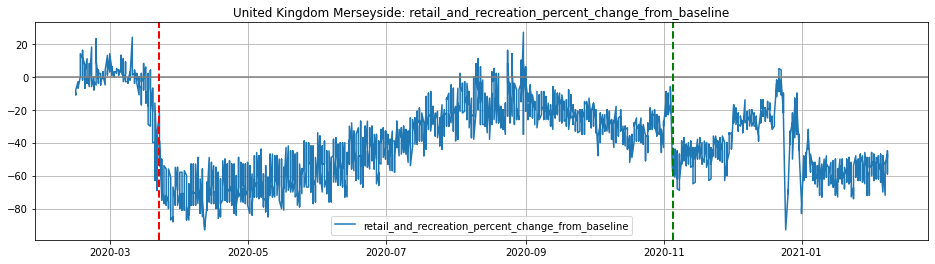

grocery_and_pharmacy_percent_change_from_baseline


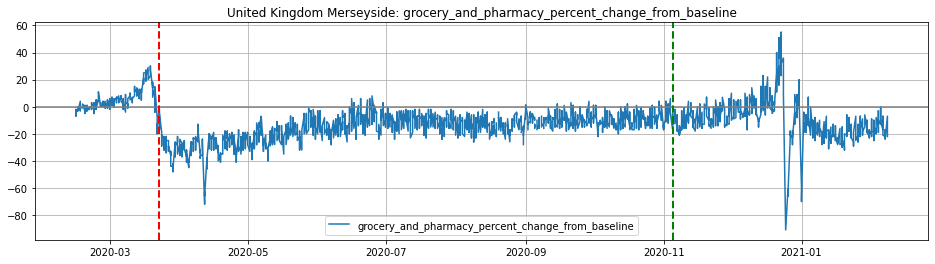

parks_percent_change_from_baseline


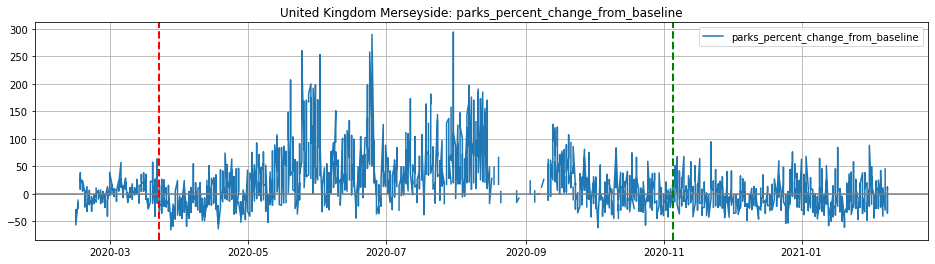

transit_stations_percent_change_from_baseline


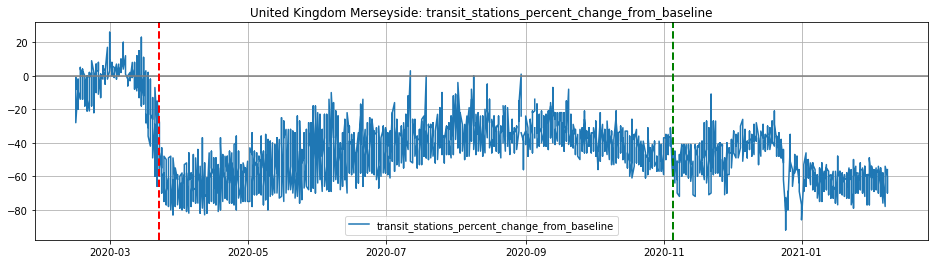

workplaces_percent_change_from_baseline


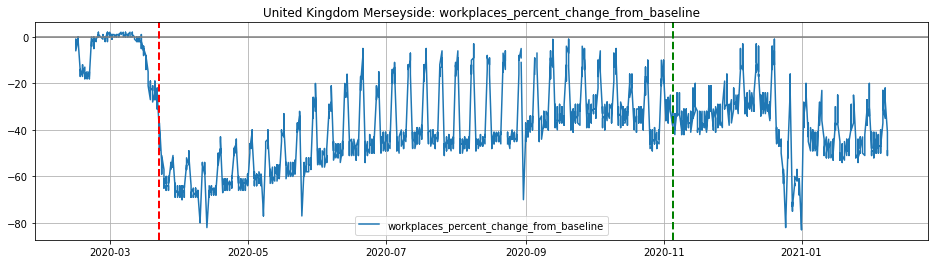

residential_percent_change_from_baseline


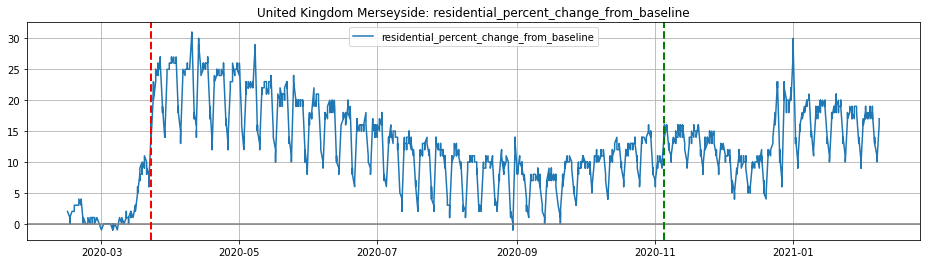

In [ ]:
# The column sub_region_1 shows the division of each country. For the UK, its upper-tier local authorities.
country = 'United Kingdom'
region = 'Merseyside'
subset_mobility = mobility[(mobility['country_region']== country) & (mobility['sub_region_1']==region)]
subset_mobility.loc[:,'date'] = pd.to_datetime(subset_mobility.loc[:,'date'])
subset_mobility = subset_mobility.sort_values('date', ascending=True)
 
# Let's plot the time series for Merseyside.
for group in mobility_categories:
    print(group)
     
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(subset_mobility['date'], subset_mobility[group], label=group)
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
    ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown
    plt.title(country + ' '+ region + ': ' + group)
    plt.legend(loc='best') 
    plt.grid()
    plt.show();

**Which local authority follows the regulations the best, which one the worst?**

In [ ]:
subset_uk = mobility[(mobility['country_region']==country)]
subset_uk.loc[:,'date'] = pd.to_datetime(subset_uk.loc[:,'date'])
subset_uk = subset_uk.sort_values('date', ascending=True)
subset_uk.head()

country_region_code  ... residential_percent_change_from_baseline
1523979                  GB  ...                                      2.0
1629376                  GB  ...                                      3.0
1530052                  GB  ...                                      2.0
1629016                  GB  ...                                      3.0
1628769                  GB  ...                                      NaN

[5 rows x 14 columns]

retail_and_recreation_percent_change_from_baseline


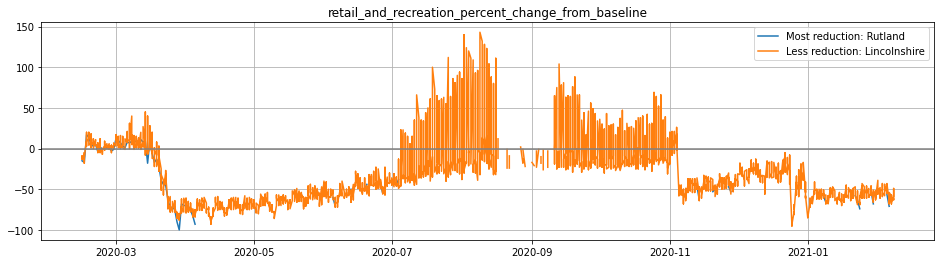

grocery_and_pharmacy_percent_change_from_baseline


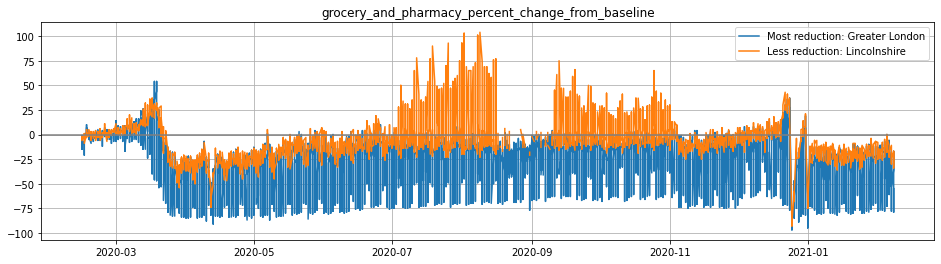

parks_percent_change_from_baseline


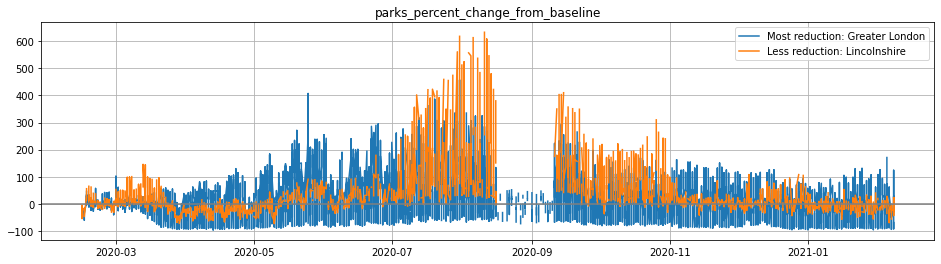

transit_stations_percent_change_from_baseline


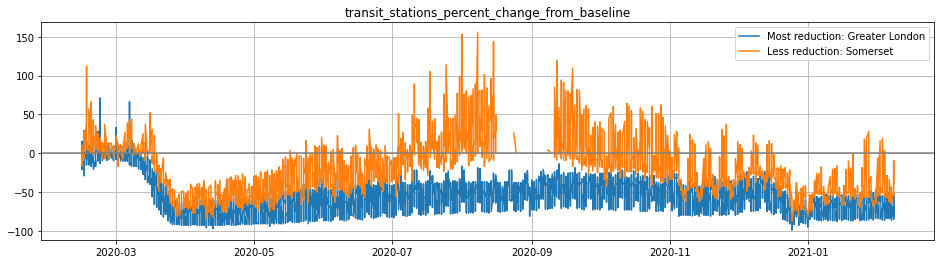

workplaces_percent_change_from_baseline


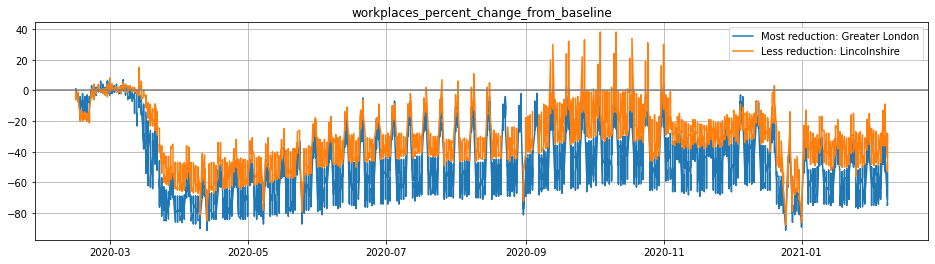

residential_percent_change_from_baseline


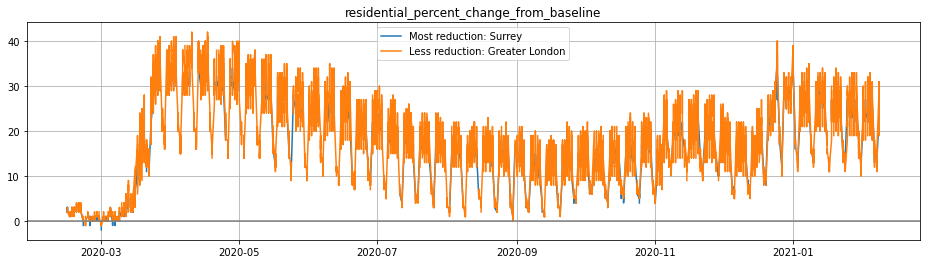

In [ ]:
last_utla = subset_uk[subset_uk['sub_region_1'].notna()]

for group in mobility_categories:
    print(group)
    min_dt = last_utla[last_utla[group]== last_utla[['sub_region_1', group]][group].min()]
    max_dt = last_utla[last_utla[group]== last_utla[['sub_region_1', group]][group].max()]
    
    fig, ax = plt.subplots(figsize=(16, 4))
    
    plt.plot(subset_uk[(subset_uk['sub_region_1'] == min_dt['sub_region_1'].values[0])]['date'], 
             subset_uk[(subset_uk['sub_region_1'] ==  min_dt['sub_region_1'].values[0])][group], 
             label='Most reduction: ' +  min_dt['sub_region_1'].values[0])
    plt.plot(subset_uk[(subset_uk['sub_region_1'] == max_dt['sub_region_1'].values[0])]['date'], 
             subset_uk[(subset_uk['sub_region_1'] == max_dt['sub_region_1'].values[0])][group], 
             label='Less reduction: ' + max_dt['sub_region_1'].values[0])


    ax.axhline(y=0, color='gray')
    #ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2)
    plt.title(group)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()  

If we want to compare them all, we can make use of this good looking kind of plot called Joyplot due its similarity with the cover of the album "Unknown Pleasures" of Joy Division.

In [ ]:
!pip install joypy

In [ ]:
mobility_sites = pd.read_csv("gdrive/My Drive/Files/Mobility_sites.csv");
mobility_england = pd.merge(last_utla, mobility_sites, on="sub_region_1", how="inner")
mobility_england = mobility_england.loc[mobility_england['country'] == "England"]

In [ ]:
mobility_categories

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

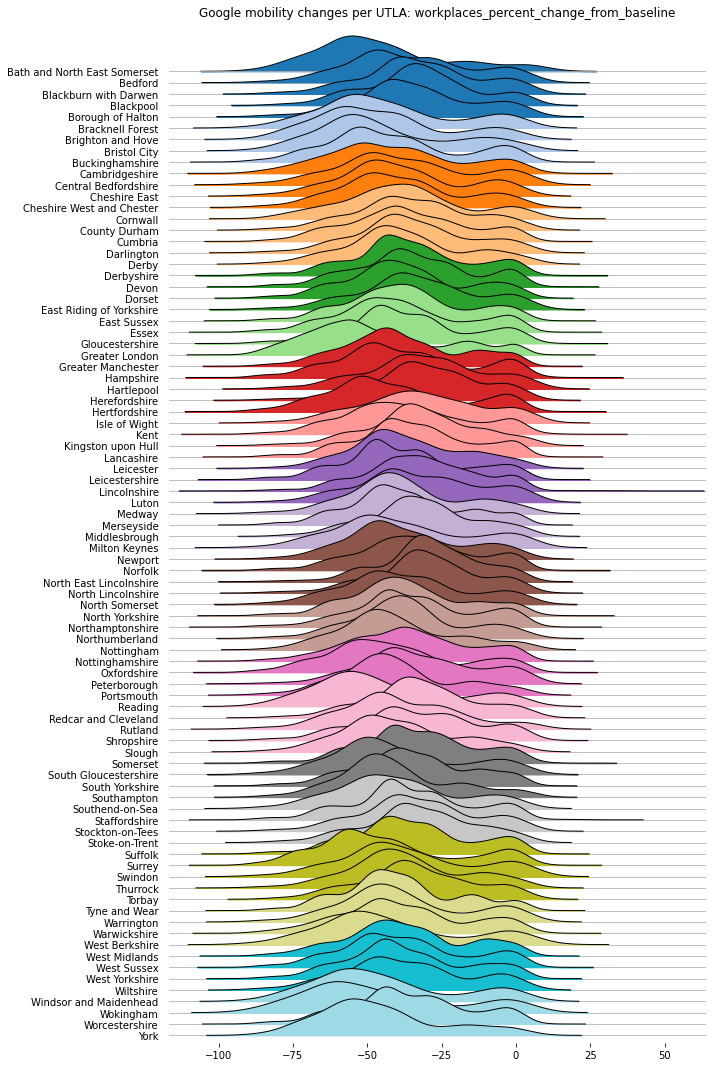

In [ ]:
import joypy
from matplotlib import cm

group= mobility_categories[4]

fig, axes = joypy.joyplot(mobility_england, by="sub_region_1", column=group, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(10,15),
                          title="Google mobility changes per UTLA: " + group,
                          colormap=cm.tab20)

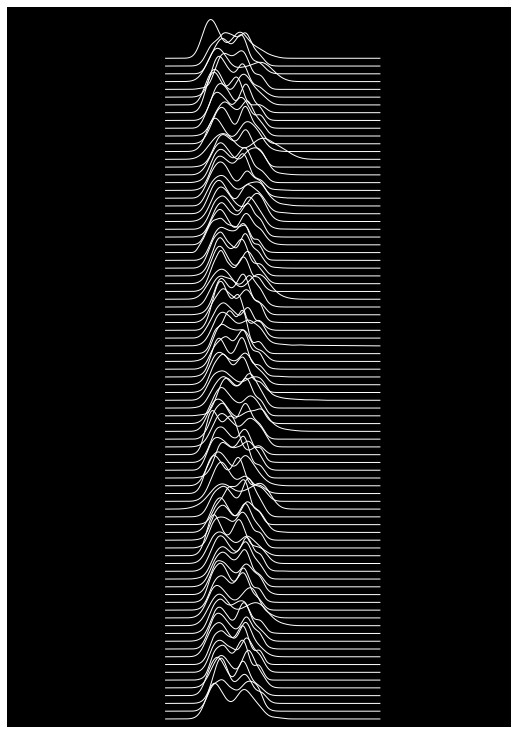

In [ ]:
group= mobility_categories[0]

fig, axes = joypy.joyplot(mobility_england, by="sub_region_1", column=group,
                          grid=False, linewidth=1, legend=False, fill=False, figsize=(7,10),
                          background="k", linecolor="w", title=None, ylabels=False, xlabels=False)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-50]:
    a.set_xlim([-400,400])
plt.tight_layout()
plt.show()

**Google Trends vs Google Mobility**

This is a very clever idea, grabbed from TheViralML show. Google also publishes trends based on our Google searches. If we compare these trends (e.g. interest of users on a particular place) versus actual Mobility trends, we could see how serious people are about following government advice.

You can download these data from: https://trends.google.com/trends/?geo=GB. 

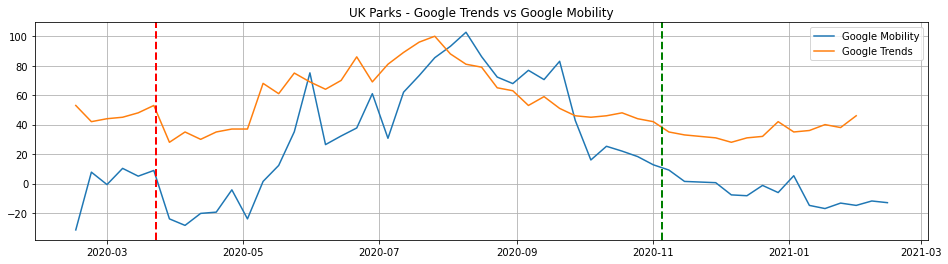

In [ ]:
parks_uk = pd.read_csv("gdrive/My Drive/Files/parks_uk.csv", skiprows=2)
parks_uk['Date'] = pd.to_datetime(parks_uk['Week'])
parks_uk.set_index("Date", inplace=True)

overall_uk = mobility[(mobility['country_region']==country) & (mobility["sub_region_1"].isna())]
overall_uk['date'] = pd.to_datetime(overall_uk['date'])
overall_uk = overall_uk.set_index("date")
weekly_uk = overall_uk.resample("1W").mean()

fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(weekly_uk['parks_percent_change_from_baseline'],
        label='Google Mobility')
 
plt.plot(parks_uk['parks: (United Kingdom)'], label='Google Trends')
plt.title('UK Parks - Google Trends vs Google Mobility')
plt.legend(loc='best') 

ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown
plt.grid()

**A fair question: Is there any relation between mobility & Covid-19 cases?**

This is difficult to compare considering the high-aggregated level of the mobility data and, most importantly, of the Covid-19 cases.

In the website https://coronavirus.data.gov.uk/details/cases, new cases are presented by specimen date (the date when the sample was taken from the person being tested), by published date (the date the case was first included in the published totals) and cumulative cases. 

However, the availability of each of these time series varies by area. Thus, the daily timeseries are reported at a nation level, whereas local authorities cases are reported in total and as a rate per 100,000 population, making it difficult to investigate any potential correlations with Mobility.

Let's take a look at a nation level analysis.

---



In [ ]:
overall_uk = overall_uk.reset_index()
covid_cases = pd.read_csv("gdrive/My Drive/Files/data_2021-Feb-09.csv")
covid_cases["date"] = pd.to_datetime(covid_cases["date"])

Correlation coefficient:  -0.10838149377227364


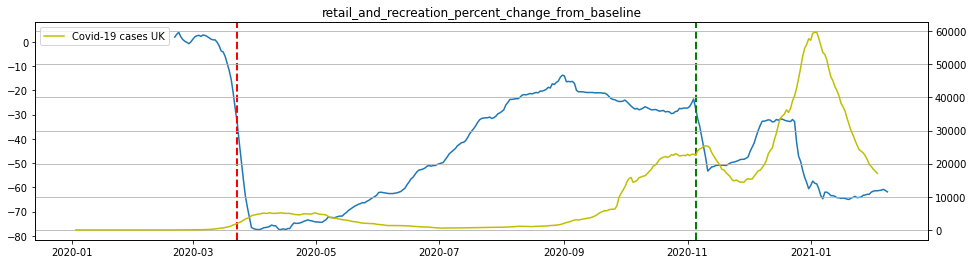

Correlation coefficient:  0.07724363039933971


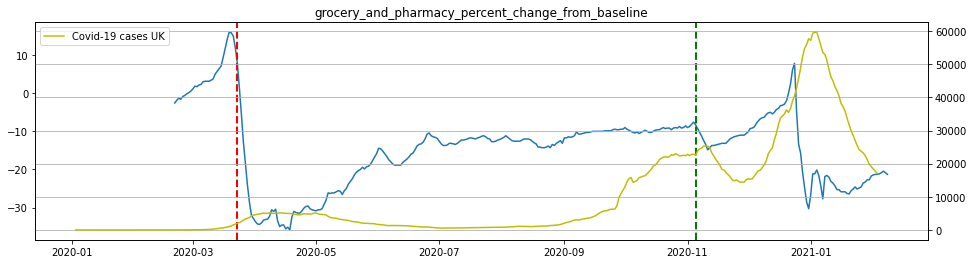

Correlation coefficient:  -0.2800640724343589


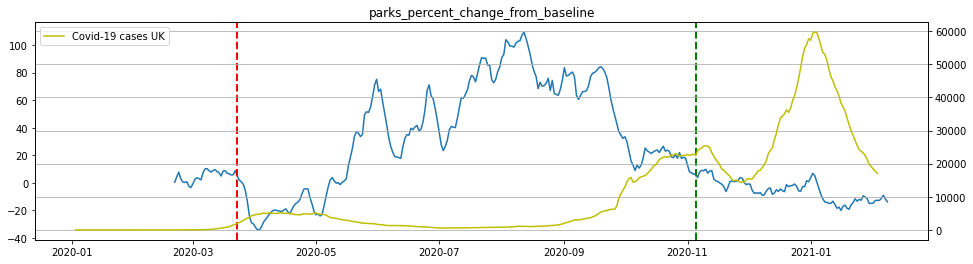

Correlation coefficient:  0.0690169192119109


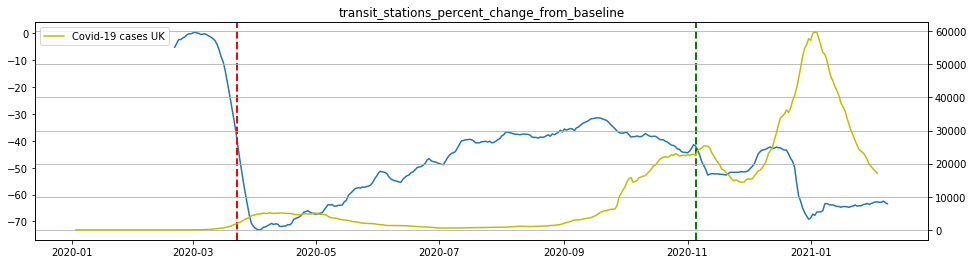

Correlation coefficient:  -0.020386522954935912


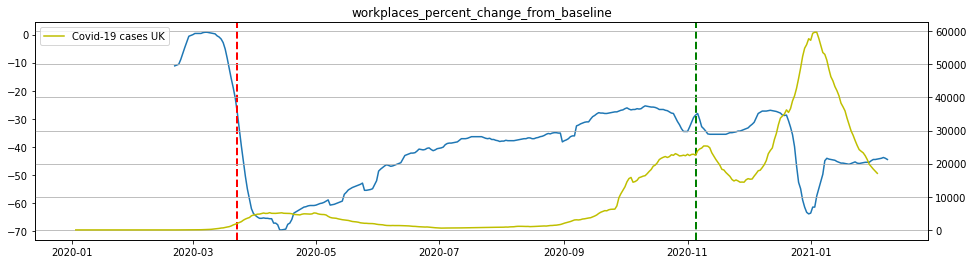

Correlation coefficient:  0.11565458459039074


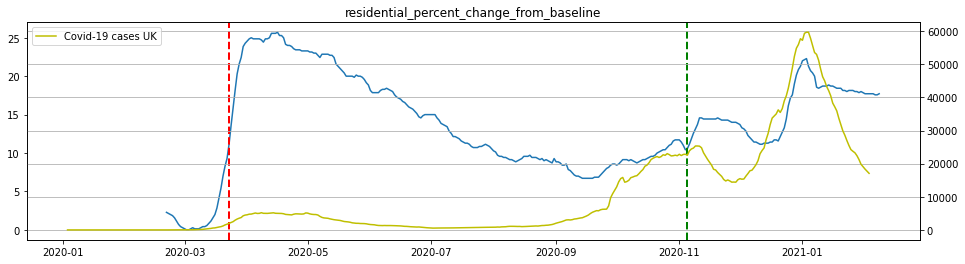

In [ ]:
for group in mobility_categories:
  print("Correlation coefficient: ", overall_uk[group].corr(covid_cases['newCasesByPublishDate']))

  fig, ax = plt.subplots(figsize=(16, 4))
  plt.plot(overall_uk["date"], overall_uk[group].rolling(7).mean(), 
             label="Mobility UK level")
  ax1 = ax.twinx()
  plt.plot(covid_cases['date'], covid_cases['newCasesByPublishDate'].rolling(7).mean(),
             color="y", label="Covid-19 cases UK")

  ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
  ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown    
  plt.title(group)
  plt.legend(loc='best') 
  plt.grid()
  plt.show()  

**How about pollution?**

To conclude, we will compare our mobility dataset with pollution records. These are obtained from https://uk-air.defra.gov.uk/data/data_selector, and they require a bit of pre-processing that we won't include here.

Correlation coefficient:  0.2766034466428757


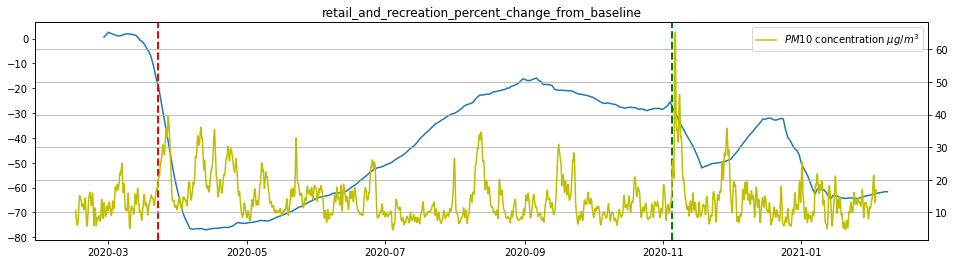

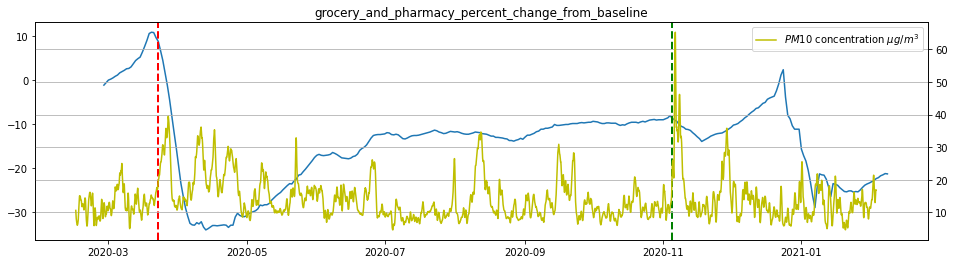

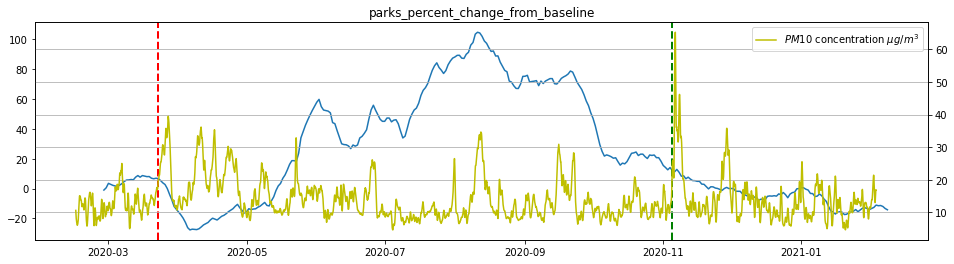

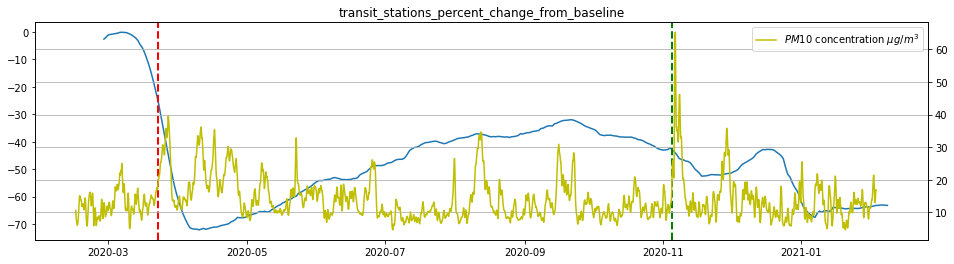

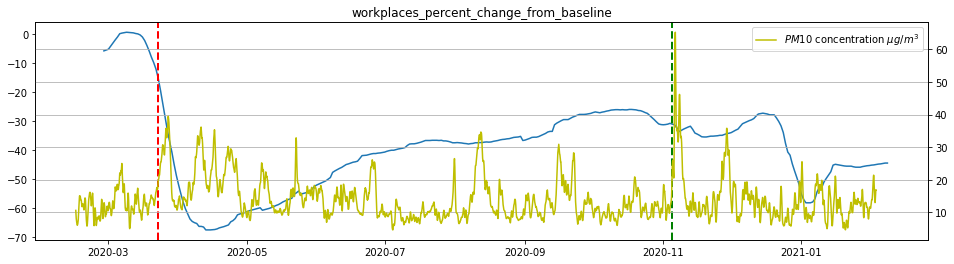

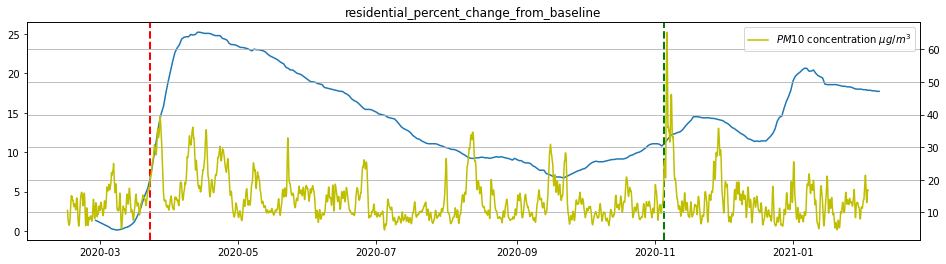

In [ ]:
print("Correlation coefficient: ", overall_uk[group].corr(pm10_dd['Average pm10']))

for group in mobility_categories:
  fig, ax = plt.subplots(figsize=(16, 4))
  plt.plot(overall_uk["date"], overall_uk[group].rolling(14).mean(), 
             label="Mobility UK level")
  ax1 = ax.twinx()
  plt.plot(pm10_dd['Date_time'], pm10_dd['Average pm10'].rolling(14).mean(),
             color="y", label="$PM10$ concentration $µg/m^{3}$")

  ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
  ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown    
  plt.title(group)
  plt.legend(loc='best') 
  plt.grid()
  plt.show()  

Let's create a correlation matrix with all pollutants and all categories of mobility.

In [ ]:
daily_covid_mob.head(3)

date  ...  residential_percent_change_from_baseline
0 2020-02-16  ...                                       1.0
1 2020-02-17  ...                                       2.0
2 2020-02-18  ...                                       2.0

[3 rows x 23 columns]

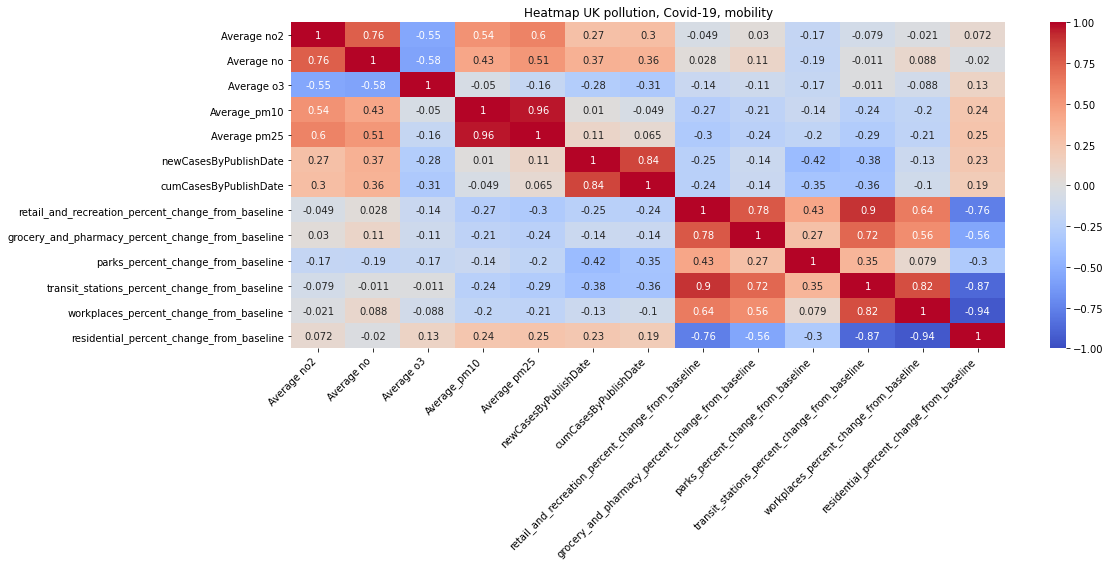

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(daily_covid_mob.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

ax.set_title("Heatmap UK pollution, Covid-19, mobility");

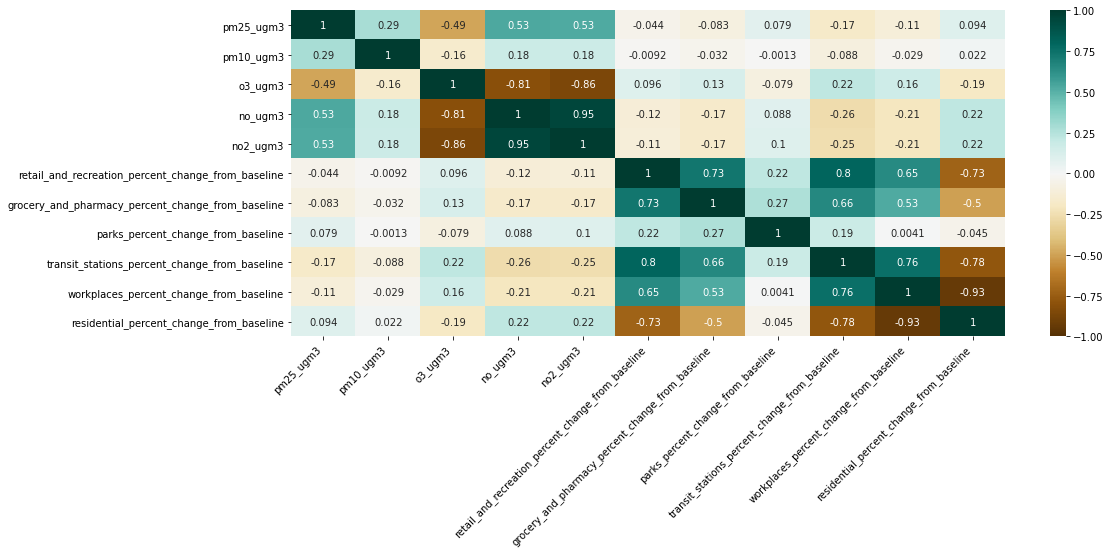

In [ ]:
correlations = all_data.corr()

import seaborn as sns

plt.figure(figsize=(16, 6))
ax = sns.heatmap(correlations, cmap='BrBG', vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

That doesn't mean that pollution hasn't been greatly reduced during the pandemic. The following map illustrates the change.

From [this paper](https://doi.org/10.1007/s11869-020-00937-0).

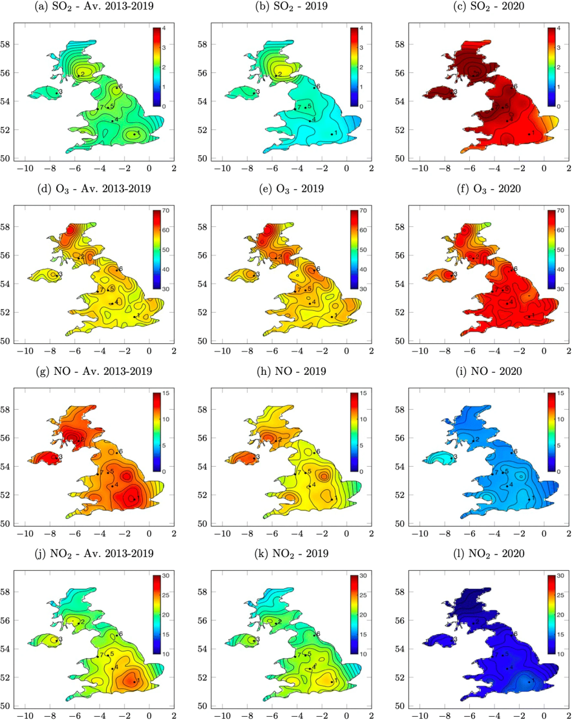

In [ ]:
Image(filename="gdrive/My Drive/Files/mob_ppt/map_uk_pollution.png")

I hope this presentation gave you an insight into the potential opportunities in data science related to us and our environment. This analysis is just the beginning of a project, always remember that correlation does not imply causation. There are still many tests to perform in order to understand more what's the contribution of mobility on urban pollution and other phenomena.

Thank you all for listening!!

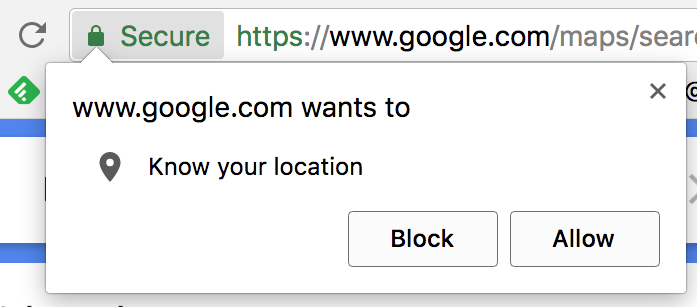

In [ ]:
Image(filename="gdrive/My Drive/Files/mob_ppt/location.png")

### *Complementary code (not shown)*

In [ ]:
!pip install seaborn

In [ ]:
path = "gdrive/My Drive/Files/mob_ppt/"
i = "Unnamed: 0"

no2 = pd.read_csv(path + "no2_cc.csv", index_col=i)
no = pd.read_csv(path + "no_cc.csv", index_col=i)
ozone = pd.read_csv(path + "ozone_cc.csv", index_col=i)
pm10 = pd.read_csv(path + "pm10_cc.csv", index_col=i)
pm25 = pd.read_csv(path + "pm25_cc.csv", index_col=i)

In [ ]:
no2["Average no2"] = no2.mean(axis=1, numeric_only=True)
no["Average no"] = no.mean(axis=1, numeric_only=True)
ozone["Average o3"] = ozone.mean(axis=1, numeric_only=True)
pm10["Average pm10"] = pm10.mean(axis=1, numeric_only=True)
pm25["Average pm25"] = pm25.mean(axis=1, numeric_only=True)

In [ ]:
no2["Date_time"] = pd.to_datetime(no2["Date_time"])
no["Date_time"] = pd.to_datetime(no["Date_time"])
ozone["Date_time"] = pd.to_datetime(ozone["Date_time"])
pm10["Date_time"] = pd.to_datetime(pm10["Date_time"])
pm25["Date_time"] = pd.to_datetime(pm25["Date_time"])

In [ ]:
no2_dd = no2.set_index("Date_time")
no_dd = no.set_index("Date_time")
ozone_dd = ozone.set_index("Date_time")
pm10_dd = pm10.set_index("Date_time")
pm25_dd = pm25.set_index("Date_time")

no2_dd = no2_dd.resample("1D").mean()
no_dd = no_dd.resample("1D").mean()
ozone_dd = ozone_dd.resample("1D").mean()
pm10_dd = pm10_dd.resample("1D").mean()
pm25_dd = pm25_dd.resample("1D").mean()

In [ ]:
no2_dd = no2.reset_index()
no_dd = no.reset_index()
ozone_dd = ozone.reset_index()
pm10_dd = pm10.reset_index()
pm25_dd = pm25.reset_index()

In [ ]:
all_dd = no2_dd[["Date_time","Average no2"]].copy()
all_dd["Average no"] = no_dd["Average no"]
all_dd["Average o3"] = ozone_dd["Average o3"]
all_dd["Average_pm10"] = pm10_dd["Average pm10"]
all_dd["Average pm25"] = pm25_dd["Average pm25"]
all_dd.rename(columns={"Date_time": "date"}, inplace=True)
daily_covid_all = pd.merge(all_dd, covid_cases, on="date", how="inner")

In [ ]:
daily_covid_mob = pd.merge(daily_covid_all, overall_uk, on="date", how="inner")
daily_covid_mob.drop("census_fips_code", axis=1, inplace=True)

Correlation coefficient:  0.11409465901474931


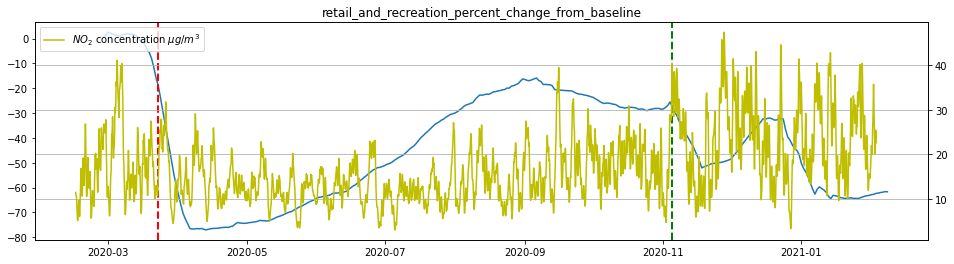

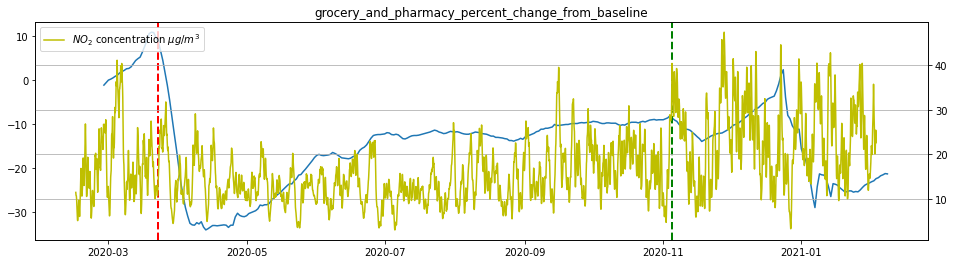

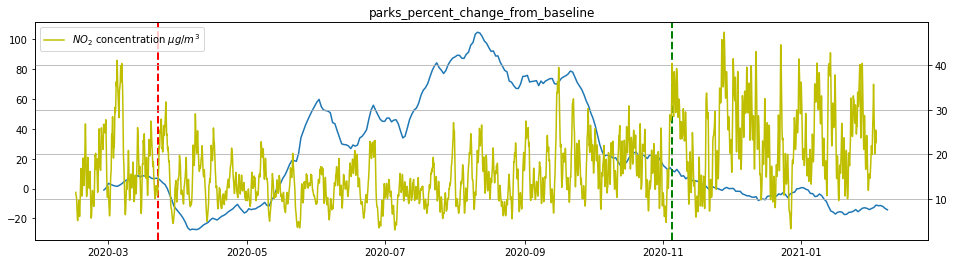

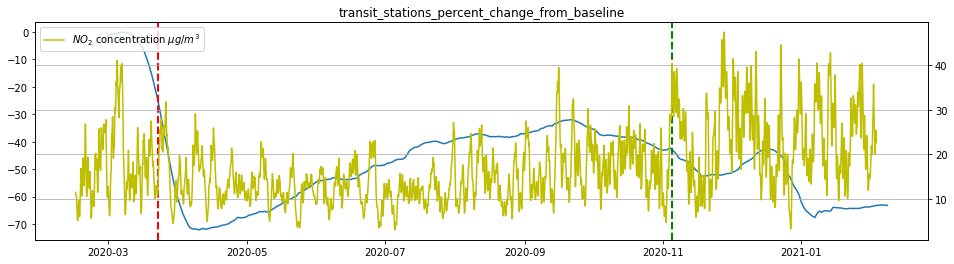

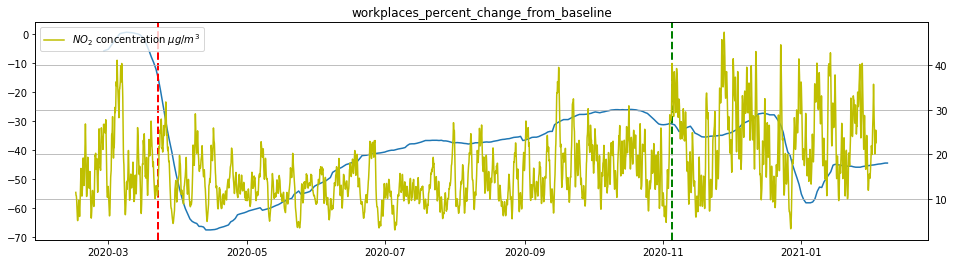

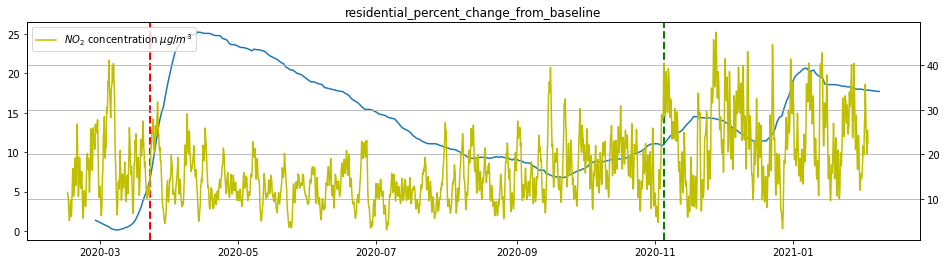

In [ ]:
"""NO2"""

print("Correlation coefficient: ", overall_uk[group].corr(no2_dd['Average no2']))

for group in mobility_categories:
  fig, ax = plt.subplots(figsize=(16, 4))
  plt.plot(overall_uk["date"], overall_uk[group].rolling(14).mean(), 
             label="Mobility UK level")
  ax1 = ax.twinx()
  plt.plot(no2_dd['Date_time'], no2_dd['Average no2'].rolling(14).mean(),
             color="y", label="$NO_{2}$ concentration $µg/m^{3}$")

  ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
  ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown    
  plt.title(group)
  plt.legend(loc='best') 
  plt.grid()
  plt.show()  

Correlation coefficient:  0.04405506180465959


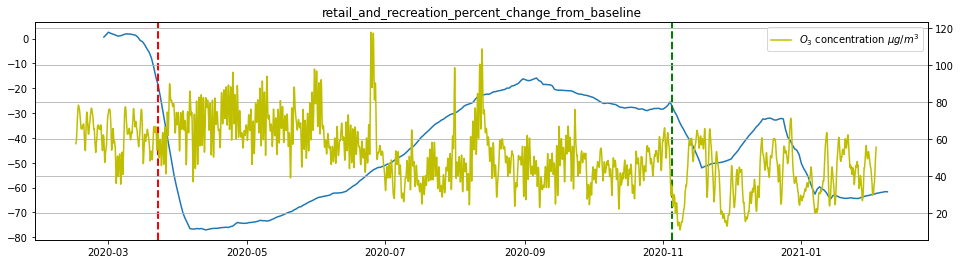

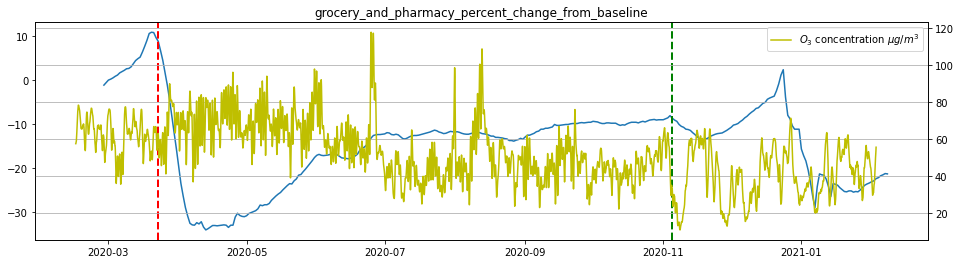

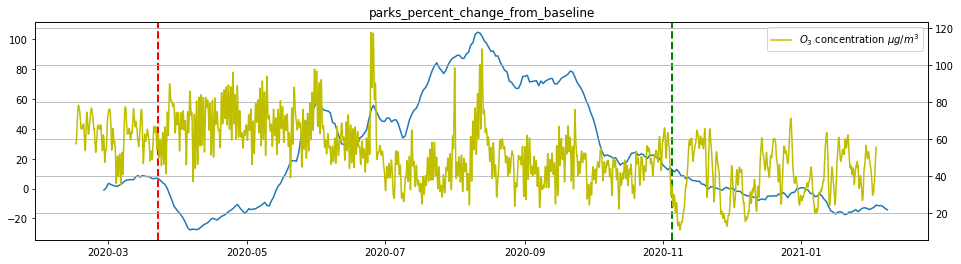

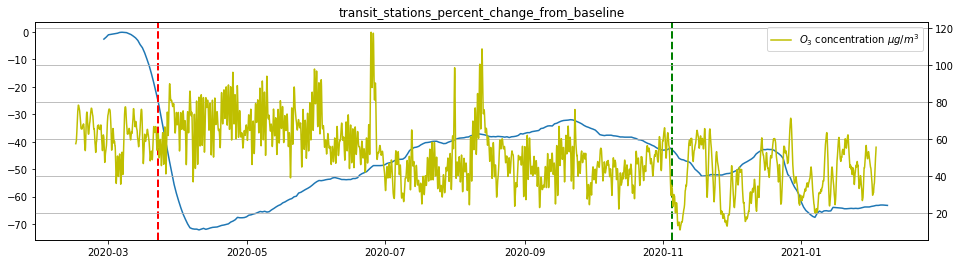

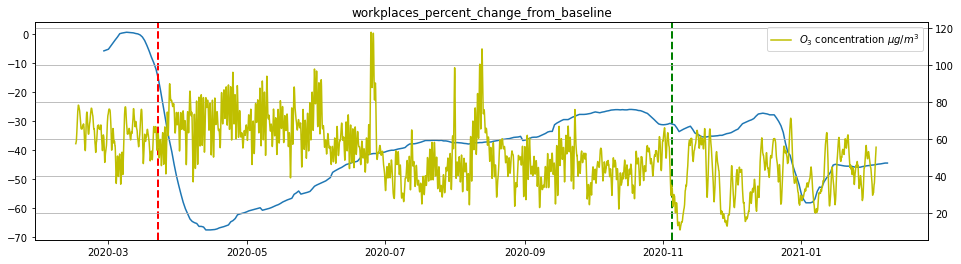

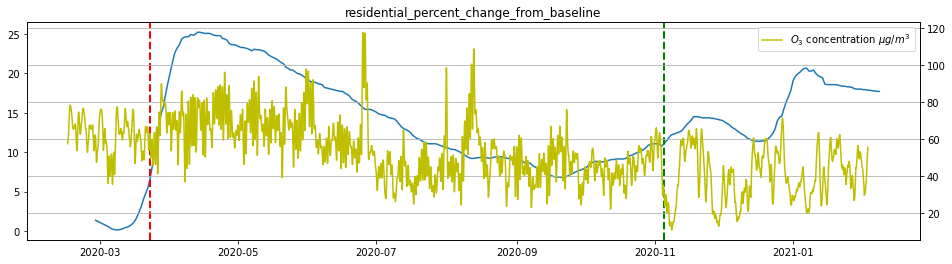

In [ ]:
"""O3"""

print("Correlation coefficient: ", overall_uk[group].corr(ozone_dd['Average o3']))

for group in mobility_categories:
  fig, ax = plt.subplots(figsize=(16, 4))
  plt.plot(overall_uk["date"], overall_uk[group].rolling(14).mean(), 
             label="Mobility UK level")
  ax1 = ax.twinx()
  plt.plot(ozone_dd['Date_time'], ozone_dd['Average o3'].rolling(14).mean(),
             color="y", label="$O_{3}$ concentration $µg/m^{3}$")

  ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
  ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown    
  plt.title(group)
  plt.legend(loc='best') 
  plt.grid()
  plt.show()  

Correlation coefficient:  0.2152765940620784


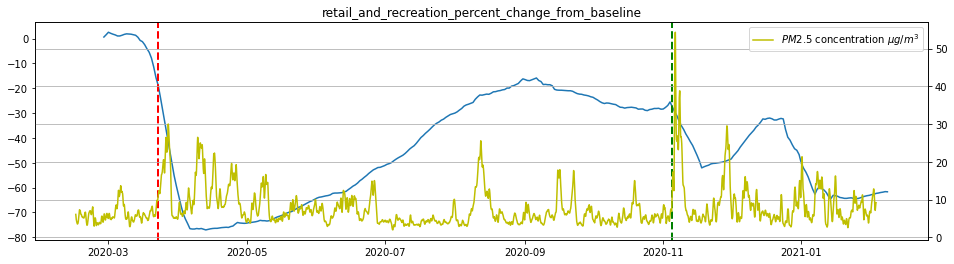

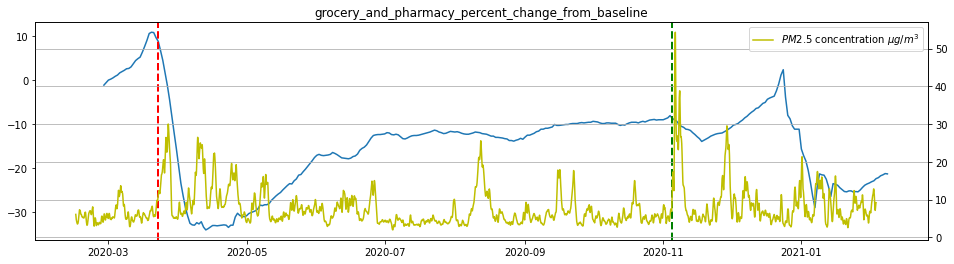

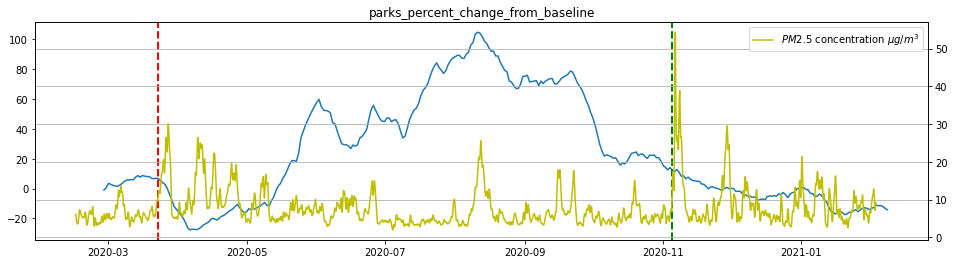

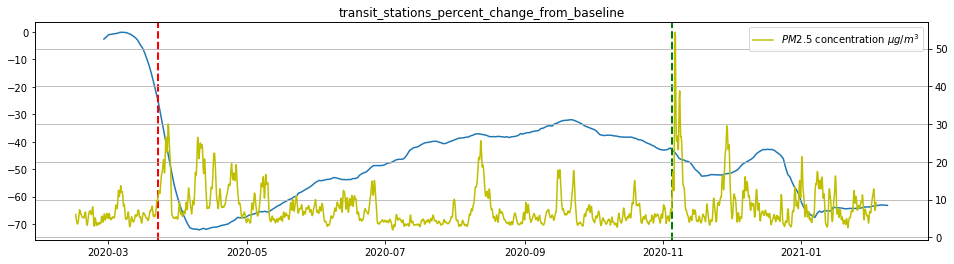

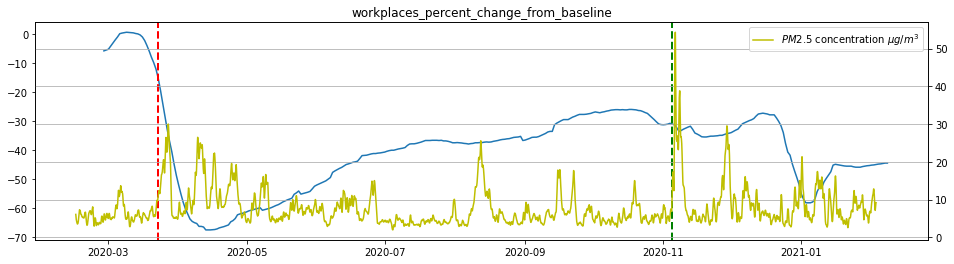

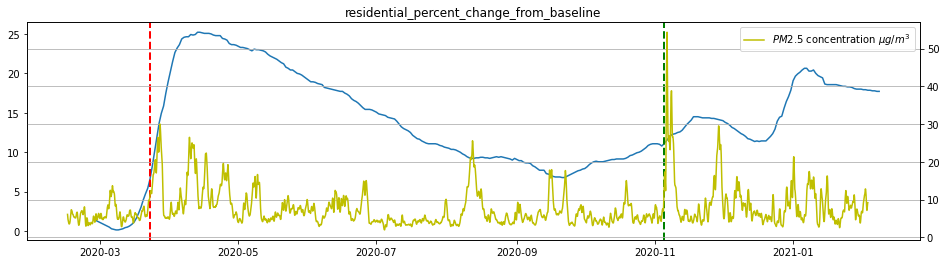

In [ ]:
"""PM2.5"""

print("Correlation coefficient: ", overall_uk[group].corr(pm25_dd['Average pm25']))

for group in mobility_categories:
  fig, ax = plt.subplots(figsize=(16, 4))
  plt.plot(overall_uk["date"], overall_uk[group].rolling(14).mean(), 
             label="Mobility UK level")
  ax1 = ax.twinx()
  plt.plot(pm25_dd['Date_time'], pm25_dd['Average pm25'].rolling(14).mean(),
             color="y", label="$PM2.5$ concentration $µg/m^{3}$")

  ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2) # 1st lockdown
  ax.axvline(pd.to_datetime('2020-11-05'), color='g', linestyle='--', lw=2) # 2nd lockdown    
  plt.title(group)
  plt.legend(loc='best') 
  plt.grid()
  plt.show()  

In [ ]:
all_data = pd.read_csv(path + "defra_sites_mob_pol.csv", index_col=i)

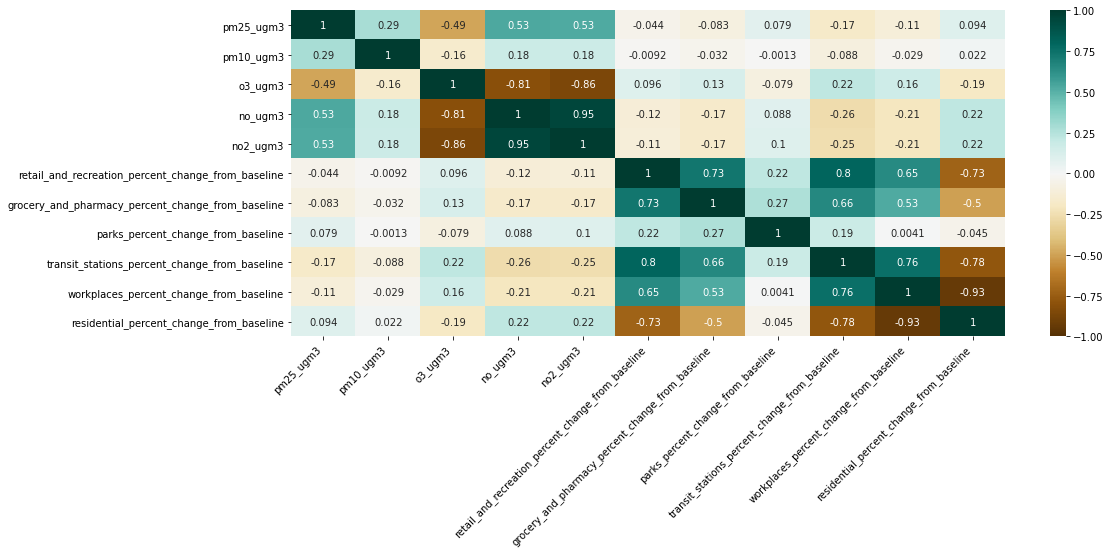

In [ ]:
correlations = all_data.corr()

import seaborn as sns

plt.figure(figsize=(16, 6))
ax = sns.heatmap(correlations, cmap='BrBG', vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);